In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kpop-groups-dataset/kpopgroups.csv


In [2]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317146 sha256=3cc3b2f048a0527e90c0bd52c7959044e7c1029523f129f4ba0e8a3a7caf7765
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import SparkSession
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.Builder().master("local[1]").appName("SparkByExamples.com").getOrCreate()

df = spark.read.csv("/kaggle/input/kpop-groups-dataset/kpopgroups.csv")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/06/09 15:50:10 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
df.head()

Row(_c0='Name', _c1='Short', _c2='Korean Name', _c3='Gender', _c4='Debut', _c5='Company', _c6='Members', _c7='Orig Memb', _c8='Fanclub Name', _c9='Active')

In [6]:
df.show(5)

+--------+-----+------------+------+----------+---------+-------+---------+------------+------+
|     _c0|  _c1|         _c2|   _c3|       _c4|      _c5|    _c6|      _c7|         _c8|   _c9|
+--------+-----+------------+------+----------+---------+-------+---------+------------+------+
|    Name|Short| Korean Name|Gender|     Debut|  Company|Members|Orig Memb|Fanclub Name|Active|
|(G)I-DLE| null|(여자)아이들|Female| 2/05/2018|     Cube|      5|        6|        null|   Yes|
|    100%| null|    백퍼센트|  Male|18/09/2012|TOP Media|      4|        7|  Perfection|   Yes|
|     14U| null|      원포유|  Male|17/04/2017|       BG|     14|       14|        null|    No|
|     15&| null|  피프틴앤드|Female| 5/10/2012|      JYP|      2|        2|        null|    No|
+--------+-----+------------+------+----------+---------+-------+---------+------------+------+
only showing top 5 rows



In [7]:
df = pd.read_csv("/kaggle/input/kpop-groups-dataset/kpopgroups.csv")

In [8]:
df.head()

,Name,Short,Korean Name,Gender,Debut,Company,Members,Orig Memb,Fanclub Name,Active
0,(G)I-DLE,NaN,(여자)아이들,Female,2/05/2018,Cube,5,6,NaN,Yes
1,100%,NaN,백퍼센트,Male,18/09/2012,TOP Media,4,7,Perfection,Yes
2,14U,NaN,원포유,Male,17/04/2017,BG,14,14,NaN,No
3,15&,NaN,피프틴앤드,Female,5/10/2012,JYP,2,2,NaN,No
4,1TEAM,NaN,원팀,Male,27/03/2019,LiveWorks,5,5,NaN,No


In [9]:
df['Short'].isna()

0      True
1      True
2      True
3      True
4      True
       ... 
421    True
422    True
423    True
424    True
425    True
Name: Short, Length: 426, dtype: bool

In [10]:
temp_short = []
temp_fanclub = []

for i in range(df.shape[0]):
    if df['Short'].isna()[i] == True:
        temp_short.append(0)
    else:
        temp_short.append(1)
        
    if df['Fanclub Name'].isna()[i] == True:
        temp_fanclub.append(0)
    else:
        temp_fanclub.append(1)

In [11]:
df['Short'] = temp_short
df['Fanclub Name'] = temp_fanclub

In [12]:
df.head()

,Name,Short,Korean Name,Gender,Debut,Company,Members,Orig Memb,Fanclub Name,Active
0,(G)I-DLE,0,(여자)아이들,Female,2/05/2018,Cube,5,6,0,Yes
1,100%,0,백퍼센트,Male,18/09/2012,TOP Media,4,7,1,Yes
2,14U,0,원포유,Male,17/04/2017,BG,14,14,0,No
3,15&,0,피프틴앤드,Female,5/10/2012,JYP,2,2,0,No
4,1TEAM,0,원팀,Male,27/03/2019,LiveWorks,5,5,0,No


In [13]:
df.drop(labels=['Name', 'Korean Name'], inplace=True, axis = 1)

In [14]:
df = df.dropna()

In [15]:
df.head()

,Short,Gender,Debut,Company,Members,Orig Memb,Fanclub Name,Active
0,0,Female,2/05/2018,Cube,5,6,0,Yes
1,0,Male,18/09/2012,TOP Media,4,7,1,Yes
2,0,Male,17/04/2017,BG,14,14,0,No
3,0,Female,5/10/2012,JYP,2,2,0,No
4,0,Male,27/03/2019,LiveWorks,5,5,0,No


In [16]:
debut_day = []
debut_month = []
debut_year = []

for entry in df['Debut']:
    entry = entry.split("/")
    debut_day.append(int(entry[0]))
    debut_month.append(int(entry[1]))
    debut_year.append(int(entry[2]))

In [17]:
df.drop(labels=['Debut'], inplace=True, axis=1)

In [18]:
df['Debut_Day'] = debut_day
df['Debut_Month'] = debut_month
df['Debut_Year'] = debut_year

In [19]:
df.head()

,Short,Gender,Company,Members,Orig Memb,Fanclub Name,Active,Debut_Day,Debut_Month,Debut_Year
0,0,Female,Cube,5,6,0,Yes,2,5,2018
1,0,Male,TOP Media,4,7,1,Yes,18,9,2012
2,0,Male,BG,14,14,0,No,17,4,2017
3,0,Female,JYP,2,2,0,No,5,10,2012
4,0,Male,LiveWorks,5,5,0,No,27,3,2019


In [20]:
for col in df:
    if df[col].dtype == "object":
        df[col] = df[col].factorize()[0]

In [21]:
df.head()

,Short,Gender,Company,Members,Orig Memb,Fanclub Name,Active,Debut_Day,Debut_Month,Debut_Year
0,0,0,0,5,6,0,0,2,5,2018
1,0,1,1,4,7,1,0,18,9,2012
2,0,1,2,14,14,0,1,17,4,2017
3,0,0,3,2,2,0,1,5,10,2012
4,0,1,4,5,5,0,1,27,3,2019


array([[<Axes: title={'center': 'Short'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Company'}>],
       [<Axes: title={'center': 'Members'}>,
        <Axes: title={'center': 'Orig Memb'}>,
        <Axes: title={'center': 'Fanclub Name'}>],
       [<Axes: title={'center': 'Active'}>,
        <Axes: title={'center': 'Debut_Day'}>,
        <Axes: title={'center': 'Debut_Month'}>],
       [<Axes: title={'center': 'Debut_Year'}>, <Axes: >, <Axes: >]],
      dtype=object)

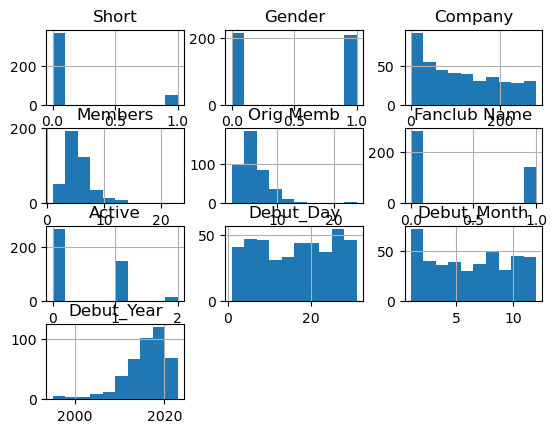

In [22]:
df.hist()

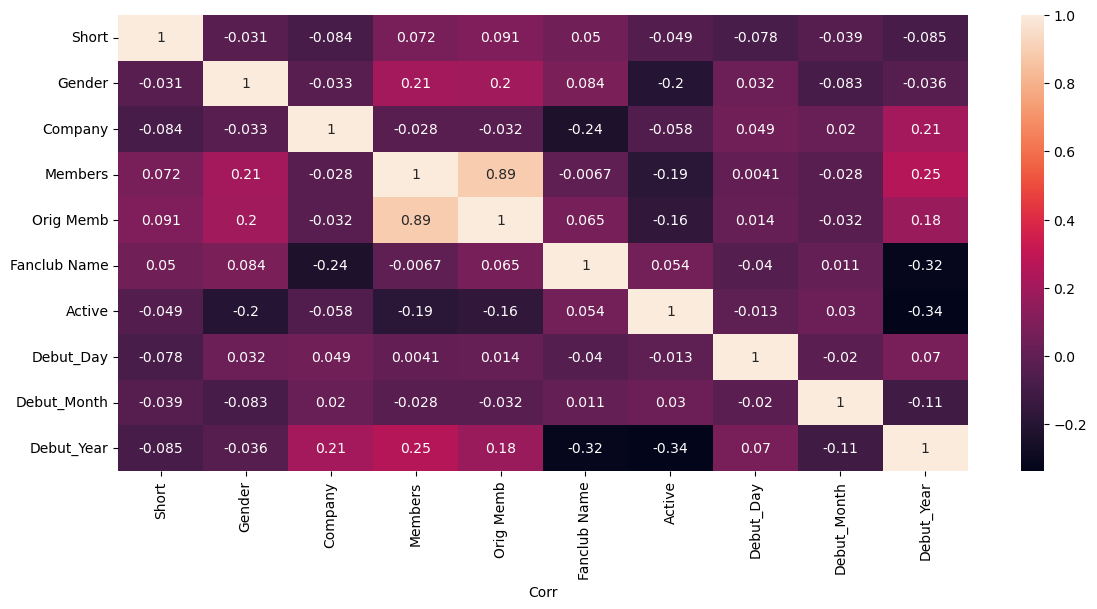

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

figure = plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)
plt.tight_layout()
plt.xlabel('Corr')
plt.show()